# Climate Finance EDA

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [3]:
# Since we will work with different data sets and folders, let's set a working directory

wd_disaster="/Users/jsjaramillo/Desktop/1-Climate Finance Project/Data/1-Disaster/"

wd_finance="/Users/jsjaramillo/Desktop/1-Climate Finance Project/Data/2-Finance/"

In [41]:
# Load the data sets

#disaster data
dis = pd.read_stata(wd_disaster+"Disaster_Dataset_Cleaned.dta")  
print(disaster_data.shape)
#disaster_data.head()

#Financial data
fin=pd.read_csv(wd_finance+"Early_30_89Days_Deliquency.csv")

fin_2=pd.read_csv(wd_finance+"Late_90plus_Deliquency.csv")


print(financial_data.shape)
#financial_data.head()

(339457, 58)
(472, 211)


In [17]:
#What is in the data?

def audit(df, name):
    print(f"\n==== {name} ====")
    print(df.dtypes.value_counts())
    print("\nTop missing columns:")
    miss = df.isna().mean().sort_values(ascending=False).head(20)
    display(miss.to_frame("missing_share"))
    print("\nColumns:")
    display(pd.Series(df.columns).to_frame("col").head(50))

audit(disaster_data, "disasters")
audit(financial_data, "Financial")


==== disasters ====
object            27
float32            9
int16              7
float64            5
int8               4
int32              4
datetime64[ns]     1
Name: count, dtype: int64

Top missing columns:


,missing_share
category,1.000000
tor_other_cz_fips,0.993655
tor_width,0.861823
tor_length,0.861823
magnitude,0.333179
end_range,0.216896
begin_range,0.216867
end_lon,0.122852
end_lat,0.122846
begin_lon,0.104243



Columns:


,col
0,FIPS_ST
1,STATENAME
2,FIPS_COUNTY
3,COUNTYNAME
4,fips
5,time
6,day
7,month
8,year
9,event_id



==== Financial ====
float64    207
object       4
Name: count, dtype: int64

Top missing columns:


,missing_share
State,0.002119
2018-09,0.000000
2018-11,0.000000
2018-12,0.000000
2019-01,0.000000
2019-02,0.000000
2019-03,0.000000
2019-04,0.000000
2019-05,0.000000
2019-06,0.000000



Columns:


,col
0,RegionType
1,State
2,Name
3,FIPSCode
4,2008-01
5,2008-02
6,2008-03
7,2008-04
8,2008-05
9,2008-06


In [110]:
# --- disasters: pick county id column ---
dis["fips"] = (
    pd.to_numeric(dis["fips"], errors="coerce")
      .astype("Int64")
      .astype(str)
      .str.zfill(5)
)

In [112]:
dis.head()

,FIPS_ST,STATENAME,FIPS_COUNTY,COUNTYNAME,fips,time,day,month,year,event_id,...,end_lat,end_lon,episode_narrative,event_narrative,data_source,month_num,fips5,fips5_check,damage_property_usd,damage_crops_usd
0,1,ALABAMA,1,AUTAUGA,01001,1982-01-01,3.0,1982-01-01,1982,9977393,...,NaN,NaN,,,PUB,1.0,01001,01001,2500.0,NaN
1,1,ALABAMA,1,AUTAUGA,01001,1982-01-01,3.0,1982-01-01,1982,9977392,...,32.73,-86.550003,,,PUB,1.0,01001,01001,250000.0,NaN
2,1,ALABAMA,1,AUTAUGA,01001,1982-04-01,26.0,1982-04-01,1982,9978548,...,32.57,-86.400002,,,PUB,4.0,01001,01001,250000.0,NaN
3,1,ALABAMA,1,AUTAUGA,01001,1985-01-01,31.0,1985-01-01,1985,9975700,...,NaN,NaN,,,PUB,1.0,01001,01001,30.0,NaN
4,1,ALABAMA,1,AUTAUGA,01001,1995-03-01,7.0,1995-03-01,1995,10314739,...,NaN,NaN,,Trees were downed on Interstate 65 near mile m...,CSV,3.0,01001,01001,2000.0,0.0


In [114]:
#Let’s build the county-month exposure table:

dis["month"] = pd.to_datetime(dis["time"], errors="coerce").dt.to_period("M").dt.to_timestamp()

dis_cm = (dis
          .groupby(["fips","month"])
          .agg(n_events=("event_id","count"))
          .reset_index())

dis_cm["disaster_any"] = (dis_cm["n_events"] > 0).astype(int)
dis_cm.head()

,fips,month,n_events,disaster_any
0,01001,1982-01-01,2,1
1,01001,1982-04-01,1,1
2,01001,1985-01-01,1,1
3,01001,1995-03-01,1,1
4,01001,1995-04-01,1,1


In [116]:
# how many unique counties and months?
n_counties = dis["fips"].nunique(dropna=True)
n_months = dis["month"].nunique(dropna=True)
print("unique counties:", n_counties, "| unique months:", n_months)

# missingness in key columns
key_cols = ["fips","month"]
key_cols += [c for c in ["event_id","event_type","damage_property","damage_crops"] if c in dis.columns]
miss = dis[key_cols].isna().mean().sort_values(ascending=False)
miss

unique counties: 3114 | unique months: 539


fips               0.0
month              0.0
event_id           0.0
event_type         0.0
damage_property    0.0
damage_crops       0.0
dtype: float64

In [118]:
#Let's summarize the damage, we need to convert the data into numbers
def parse_damage(x):
    if pd.isna(x): 
        return np.nan
    s = str(x).strip().upper()
    m = re.match(r"^([0-9]*\.?[0-9]+)\s*([KMB])?$", s)
    if not m:
        return np.nan
    val = float(m.group(1))
    suf = m.group(2)
    mult = {"K":1e3, "M":1e6, "B":1e9, None:1.0}[suf]
    return val * mult

for col in ["damage_property","damage_crops"]:
    if col in dis.columns:
        dis[col+"_usd"] = dis[col].map(parse_damage)

# quick summary
for col in ["damage_property_usd","damage_crops_usd"]:
    if col in dis.columns:
        print("\n", col)
        display(dis[col].describe(percentiles=[.5,.9,.95,.99]))


 damage_property_usd


count    3.394410e+05
mean     6.658446e+05
std      3.447900e+07
min      0.000000e+00
50%      6.000000e+03
90%      1.250000e+05
95%      5.000000e+05
99%      5.000000e+06
max      1.000000e+10
Name: damage_property_usd, dtype: float64


 damage_crops_usd


count    2.267660e+05
mean     4.857598e+04
std      1.701121e+06
min      0.000000e+00
50%      0.000000e+00
90%      0.000000e+00
95%      1.000000e+04
99%      5.000000e+05
max      5.000000e+08
Name: damage_crops_usd, dtype: float64

In [120]:
#Thecounty-month exposure table
agg_dict= {"event_id": "count"} if "event_id" in dis.columns else {}
if "damage_property_usd" in dis.columns: agg_dict["damage_property_usd"] = "sum"
if "damage_crops_usd" in dis.columns:    agg_dict["damage_crops_usd"] = "sum"

dis_cm = (dis
          .groupby(["fips","month"])
          .agg(**{
              "n_events": ("event_id","count") if "event_id" in dis.columns else ("fips","size"),
              **({"prop_damage": ("damage_property_usd","sum")} if "damage_property_usd" in dis.columns else {}),
              **({"crop_damage": ("damage_crops_usd","sum")} if "damage_crops_usd" in dis.columns else {}),
          })
          .reset_index())

dis_cm["disaster_any"] = (dis_cm["n_events"] > 0).astype(int)

dis_cm.head(), dis_cm.shape

(    fips      month  n_events  prop_damage  crop_damage  disaster_any
 0  01001 1982-01-01         2     252500.0          0.0             1
 1  01001 1982-04-01         1     250000.0          0.0             1
 2  01001 1985-01-01         1         30.0          0.0             1
 3  01001 1995-03-01         1       2000.0          0.0             1
 4  01001 1995-04-01         1      35000.0          0.0             1,
 (166643, 6))

In [122]:
# Events over time
events_over_time = dis_cm.groupby("month")["n_events"].sum()
display(events_over_time.head())
display(events_over_time.tail())

# Top counties by exposure months
top_exposed = dis_cm.groupby("fips")["disaster_any"].sum().sort_values(ascending=False).head(20)
top_exposed

month
1980-01-01      5
1980-02-01     10
1980-03-01     46
1980-04-01    136
1980-05-01    144
Name: n_events, dtype: int64

month
2024-10-01    156
2024-11-01    206
2024-12-01    297
2025-01-01    122
2025-02-01    313
Name: n_events, dtype: int64

fips
48201    239
28049    228
28121    225
28067    217
28075    204
28089    202
28149    195
22019    195
28035    187
48439    187
28129    182
01089    180
28087    179
47157    179
28163    177
28073    177
28085    174
47037    173
28127    173
12057    172
Name: disaster_any, dtype: int64

In [124]:
dis["event_type"].value_counts().head(25)

event_type
Thunderstorm        210896
Flash Flood          37348
Tornado              31084
Hail                 30910
Flood                14312
Lightning            12458
Heavy Rain            1300
Debris Flow            427
Wildfire               342
Dust Devil             141
Storm Surge/Tide       102
Strong Wind             39
Heavy Snow              26
Coastal Flood           17
Waterspout              14
High Wind               11
Funnel Cloud            10
Winter Weather           8
Seiche                   4
High Surf                3
Rip Current              2
Tropical Storm           1
Frost/Freeze             1
Marine High Wind         1
Name: count, dtype: int64

Let's try to do the same for the financial data set, first merge both financial data.

Let's print the first 5 rows:

In [142]:
fin.head(10)

,RegionType,State,Name,FIPSCode,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,...,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,fips
1,County,AL,Baldwin County,'01003',2.8,3.1,3.2,2.5,2.7,2.7,...,1.7,2.0,1.6,1.8,1.7,1.7,1.9,1.8,1.8,01003
2,County,AL,Jefferson County,'01073',5.1,4.6,4.5,4.9,4.9,5.0,...,2.7,2.9,2.5,3.0,2.9,3.2,2.9,2.6,2.6,01073
3,County,AL,Lee County,'01081',3.8,4.5,4.2,3.6,3.8,4.4,...,2.0,2.3,1.3,2.1,1.6,2.7,1.8,1.0,1.6,01081
4,County,AL,Madison County,'01089',3.5,3.3,3.3,3.0,3.3,3.2,...,1.5,1.5,1.3,1.6,1.7,1.9,1.9,1.4,1.7,01089
5,County,AL,Mobile County,'01097',5.0,4.5,4.7,4.8,5.2,4.7,...,3.1,3.5,3.2,3.5,3.4,3.9,4.4,3.7,3.4,01097
6,County,AL,Montgomery County,'01101',6.0,5.3,5.1,5.4,5.1,4.7,...,3.2,3.0,2.0,3.1,2.9,3.1,2.9,2.5,3.0,01101
7,County,AL,Shelby County,'01117',3.0,3.0,3.3,2.7,2.5,3.1,...,1.9,1.9,1.4,2.0,1.8,2.0,2.3,1.7,2.0,01117
8,County,AL,Tuscaloosa County,'01125',3.9,3.2,3.2,3.5,4.5,4.1,...,3.4,3.5,2.9,3.5,2.5,4.0,4.1,3.6,3.7,01125
9,County,AK,Anchorage Municipality,'02020',2.8,2.5,2.5,2.5,2.4,2.4,...,1.4,1.5,1.3,1.4,1.0,1.2,1.6,1.3,1.3,02020
10,County,AZ,Maricopa County,'04013',3.6,3.3,3.3,3.5,3.5,3.6,...,1.3,1.4,1.1,1.5,1.2,1.6,1.6,1.3,1.4,04013


We see we need to clear the fips column

In [181]:
def clean_fips(series: pd.Series) -> pd.Series:
    s = series.astype(str)

    # Convert obvious missing placeholders to NaN
    s = s.replace(["-----", "nan", "None", ""], np.nan)

    # Keep digits only (removes quotes, decimals, spaces, etc.)
    s = s.str.replace(r"[^0-9]", "", regex=True)

    # Empty -> NaN
    s = s.replace("", np.nan)

    # Pad to 5 digits
    s = s.str.zfill(5)

    return s

# Financial file
fin["fips"] = clean_fips(fin["FIPSCode"])
fin_2["fips"] = clean_fips(fin_2["FIPSCode"])

# Drop rows with missing/invalid fips (optional but usually correct)
fin = fin.dropna(subset=["fips"])
fin_2 = fin_2.dropna(subset=["fips"])


#First we convert the data frame as a time series object, there are 207 months 
def wide_to_long(fin_df: pd.DataFrame, metric_name: str) -> pd.DataFrame:
    month_cols = [c for c in fin_df.columns if isinstance(c, str) and len(c) == 7 and c[4] == "-"]

    out = fin_df.melt(
        id_vars=["RegionType", "State", "Name", "fips"],
        value_vars=month_cols,
        var_name="ym",
        value_name="value"
    )

    out["ym"] = pd.to_datetime(out["ym"], format="%Y-%m")
    out["value"] = pd.to_numeric(out["value"], errors="coerce")

    #Need to merge the two financial data sets 
    #out["metric"] = metric_name


    return out

fin1_long = wide_to_long(fin, "fin_metric_1")
fin2_long = wide_to_long(fin_2, "fin_metric_2")


fin_merged = fin1_long.merge(fin2_long, on=["fips","ym"], how="left", suffixes=("_1","_2"))


fin_merged.head()

In [199]:
# Did we accidentally duplicate rows?
assert not fin_merged.duplicated(["fips","ym"]).any()

# Coverage loss (if inner join)
print("fin1 rows:", len(fin1_long))
print("fin2 rows:", len(fin2_long))
print("merged rows:", len(fin_merged))

# Missingness after merge (useful for left join)
miss = fin_merged.isna().mean().sort_values(ascending=False).head(20)
miss

fin1 rows: 97497
fin2 rows: 97497
merged rows: 97497


RegionType_1    0.0
State_1         0.0
Name_1          0.0
fips            0.0
ym              0.0
value_1         0.0
RegionType_2    0.0
State_2         0.0
Name_2          0.0
value_2         0.0
dtype: float64

In [279]:
fin = fin_merged.copy()

#Rename the columns
fin = fin.rename(columns={
    "value_1": "dq_30_89",
    "value_2": "dq_90p",
})

#disaster data has month as the time variable
fin["month"] = pd.to_datetime(fin["ym"], errors="coerce").dt.to_period("M").dt.to_timestamp()



We can start from this point to analyze the financial data

In [281]:
#grouping by 
ts = fin.groupby("ym")[["dq_30_89","dq_90p"]].mean()
ts.head(12)

,dq_30_89,dq_90p
ym,,
2008-01-01,3.442463,1.433970
2008-02-01,3.150955,1.464119
2008-03-01,2.998089,1.460297
2008-04-01,3.012102,1.433970
2008-05-01,3.161783,1.498726
2008-06-01,3.135669,1.561571
2008-07-01,3.266667,1.699151
2008-08-01,3.480892,1.759448
2008-09-01,3.532909,1.844374


In [283]:
m = fin["ym"].dropna().sort_values().iloc[-1]  # latest month available
fin.loc[fin["ym"]==m, ["dq_30_89","dq_90p"]].describe()

,dq_30_89,dq_90p
count,471.000000,471.000000
mean,1.695541,0.722293
std,0.773718,0.383034
min,0.200000,0.100000
25%,1.100000,0.500000
50%,1.600000,0.700000
75%,2.200000,0.900000
max,5.600000,2.400000


In [285]:

#Merging the data sets
panel = fin.merge(dis_cm, on=["fips","month"], how="left")
panel["disaster_any"] = panel["disaster_any"].fillna(0).astype(int)
panel["n_events"] = panel["n_events"].fillna(0)



In [287]:
panel.head()

,RegionType_1,State_1,Name_1,fips,ym,dq_30_89,RegionType_2,State_2,Name_2,dq_90p,month,n_events,prop_damage,crop_damage,disaster_any
0,County,AL,Baldwin County,01003,2008-01-01,2.8,County,AL,Baldwin County,1.3,2008-01-01,0.0,NaN,NaN,0
1,County,AL,Jefferson County,01073,2008-01-01,5.1,County,AL,Jefferson County,2.1,2008-01-01,0.0,NaN,NaN,0
2,County,AL,Lee County,01081,2008-01-01,3.8,County,AL,Lee County,1.4,2008-01-01,1.0,5000.0,0.0,1
3,County,AL,Madison County,01089,2008-01-01,3.5,County,AL,Madison County,0.8,2008-01-01,2.0,10000.0,0.0,1
4,County,AL,Mobile County,01097,2008-01-01,5.0,County,AL,Mobile County,1.9,2008-01-01,0.0,NaN,NaN,0


# My first natural question is: how quickly risk rises after an event?

Let's explore this question

In [309]:
# first disaster month per county (same as before)
first_event = (panel.loc[panel["disaster_any"] == 1]
               .groupby("fips")["month"].min()
               .rename("first_disaster_month"))

p2 = panel.join(first_event, on="fips").copy()
p2 = p2[p2["first_disaster_month"].notna()].copy()

# robust month index
p2["m_idx"]  = p2["month"].dt.year * 12 + p2["month"].dt.month
p2["m0_idx"] = p2["first_disaster_month"].dt.year * 12 + p2["first_disaster_month"].dt.month

# event time in months (int)
p2["event_time"] = (p2["m_idx"] - p2["m0_idx"]).astype(int)

# window and average outcomes
win = p2[p2["event_time"].between(-12, 12)]
evt = win.groupby("event_time")[["dq_30_89", "dq_90p"]].mean()
evt

,dq_30_89,dq_90p
event_time,,
-12,2.771698,2.279245
-11,2.856364,2.280000
-10,2.836667,2.261667
-9,2.901613,2.380645
-8,2.866667,2.482540
-7,3.023171,2.315854
-6,3.119091,2.091818
-5,3.237158,1.895628
-4,3.157466,1.831222


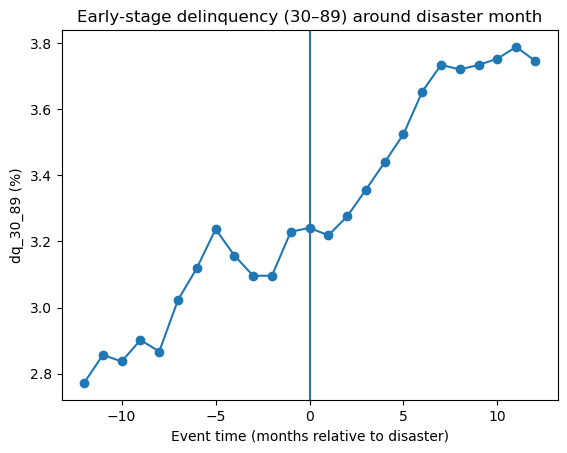

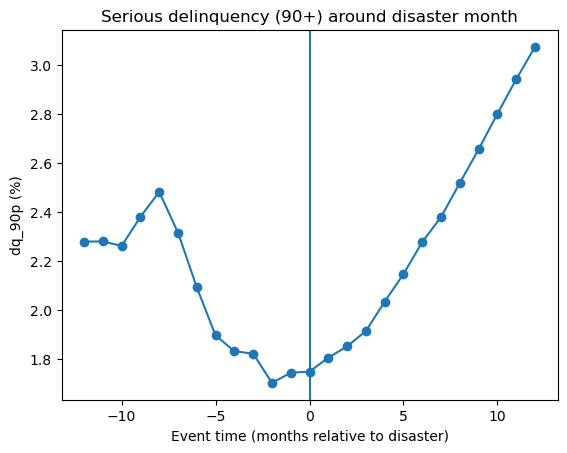

In [312]:
# --- plot dq_30_89 ---
plt.figure()
plt.plot(evt.index, evt["dq_30_89"], marker="o")
plt.axvline(0)
plt.xlabel("Event time (months relative to disaster)")
plt.ylabel("dq_30_89 (%)")
plt.title("Early-stage delinquency (30–89) around disaster month")
plt.show()

# --- plot dq_90p ---
plt.figure()
plt.plot(evt.index, evt["dq_90p"], marker="o")
plt.axvline(0)
plt.xlabel("Event time (months relative to disaster)")
plt.ylabel("dq_90p (%)")
plt.title("Serious delinquency (90+) around disaster month")
plt.show()

A couple quick read-outs from the plots:

 - dq_30_89 (early delinquency) trends upward both before and after 0, and keeps rising through +12.

 - dq_90p (serious delinquency) dips before 0 and then rises sharply after 0 through +12


**A red flag**:
 - pre-trends aren’t flat, a possible explanation could be that counties experiencing disasters at different times, or disaster timing correlated with credit conditions

# Issues

- Do not trust in my merging, could be better, there are a lot of NAN, this could bias the results, need to think about how to imputate this.

- I am not considering all the columns, maybe it's a good idea to add more variables, probably we can use important features to select the best ones, or use PCA

-

# Brainstorm ideas

- Generalize this inference procedure grouped by county, maybe 10 top counties with most disasters

- There are possible confounder variables that probably we are not controlling, e.g. our estimates above could be bias, maybe try *Two-way FE*

- Recently learn about BART, I think it fits well in the problem, and bayes analysis are becoming popular